In [79]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [19]:
students = pd.read_csv('student.csv')

students = students.drop(['Extracurricular Activities'],axis=1)
print(students.head())

   Hours Studied  Previous Scores  Sleep Hours  \
0              7               99            9   
1              4               82            4   
2              8               51            7   
3              5               52            5   
4              7               75            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


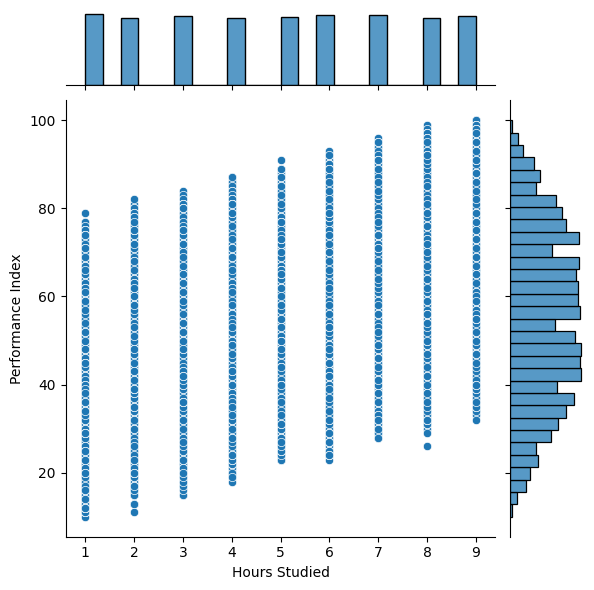

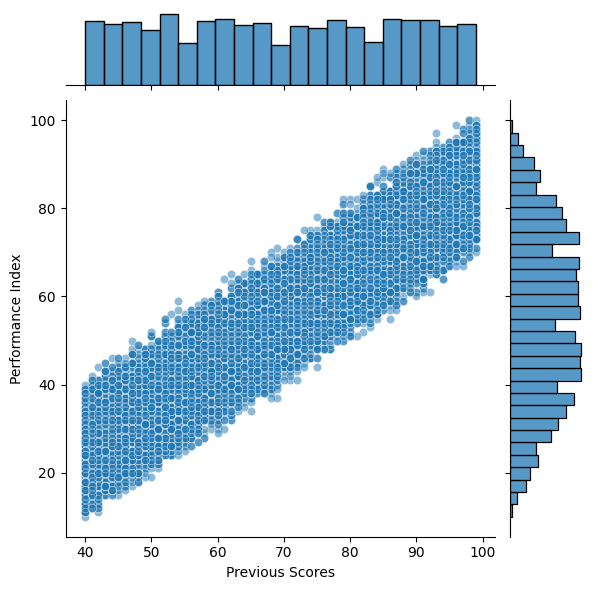

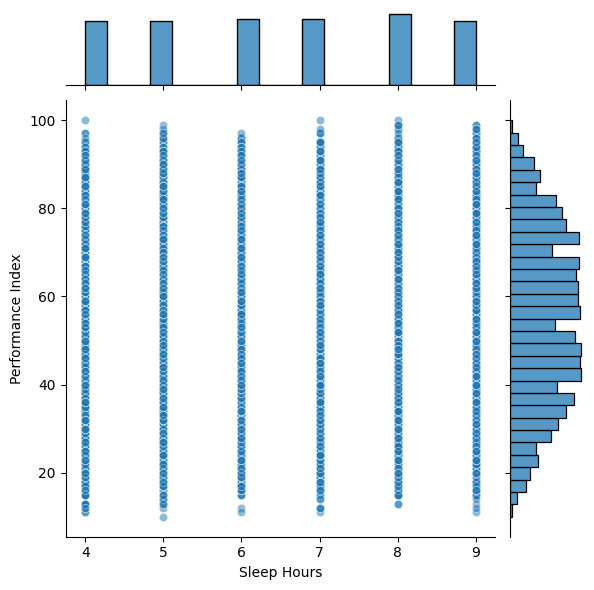

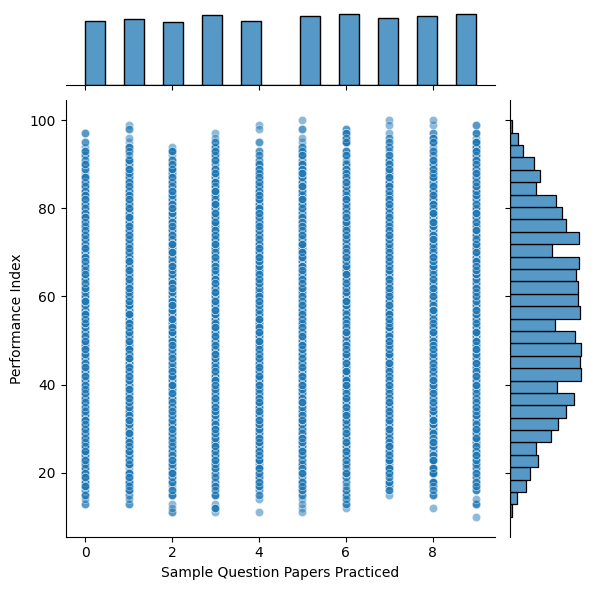

In [20]:
sns.jointplot(x='Hours Studied', y='Performance Index', data=students, alpha=1)
sns.jointplot(x='Previous Scores', y='Performance Index', data=students, alpha=0.5)
#sns.jointplot(x='Extracurricular Activities', y='Performance Index', data=students, alpha=0.5)
sns.jointplot(x='Sleep Hours', y='Performance Index', data=students, alpha=0.5)
sns.jointplot(x='Sample Question Papers Practiced', y='Performance Index', data=students, alpha=0.5)

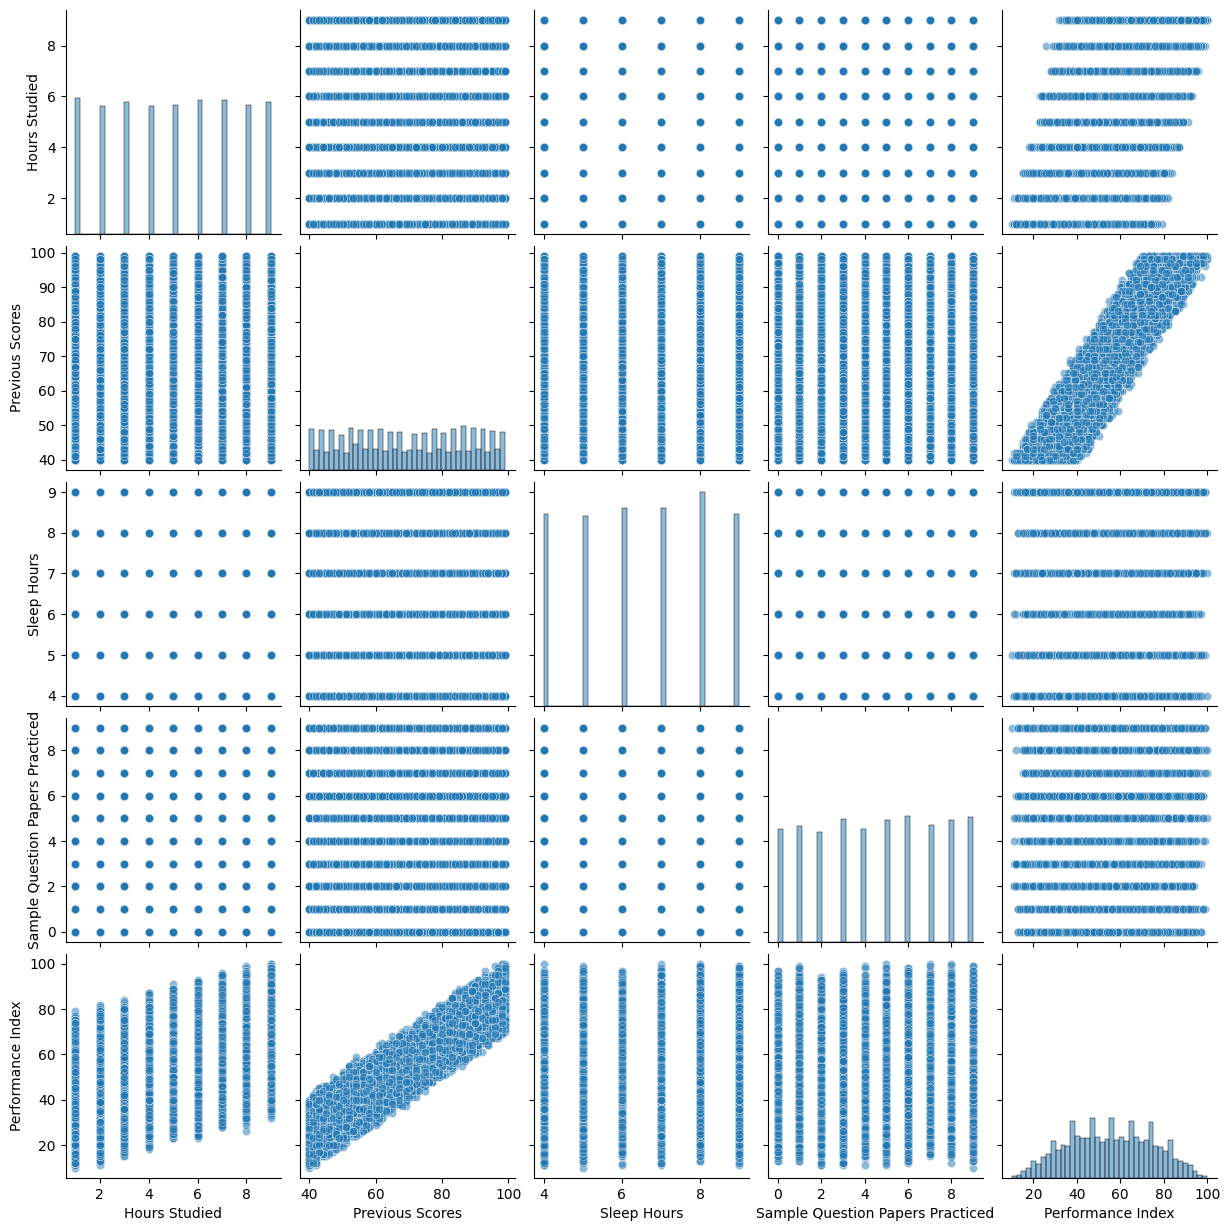

In [23]:
sns.pairplot(students,
             kind='scatter',
             plot_kws={'alpha':0.5},
             diag_kws={'alpha':0.5, 'bins':40})


In [27]:
x = students.drop(['Performance Index'],axis=1)
y = students['Performance Index']

In [39]:
print(x.iloc[1])
print("performance index=",y.iloc[1])
print(len(x))

Hours Studied                        4
Previous Scores                     82
Sleep Hours                          4
Sample Question Papers Practiced     2
Name: 1, dtype: int64
performance index= 65.0
10000


In [63]:
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.3, random_state = 30)
lreg = lr()
lreg.fit(x_train,y_train)

LinearRegression()

In [52]:
lreg.coef_

array([2.85322371, 1.01834437, 0.47900818, 0.19486964])

In [53]:
y_pred = lreg.predict(x_test)

In [77]:
for i in range(15):
    print(y_test.iloc[i], f"{y_pred[i]:.2f} = {y_test.iloc[i]-y_pred[i]:.2f}")


55.0 57.87 = -2.87
47.0 47.48 = -0.48
59.0 60.32 = -1.32
42.0 41.10 = 0.90
62.0 61.01 = 0.99
53.0 53.37 = -0.37
85.0 82.05 = 2.95
20.0 20.06 = -0.06
26.0 27.05 = -1.05
56.0 57.73 = -1.73
49.0 48.69 = 0.31
33.0 34.12 = -1.12
82.0 81.84 = 0.16
52.0 54.01 = -2.01
39.0 37.96 = 1.04


Text(0, 0.5, 'Predicted')

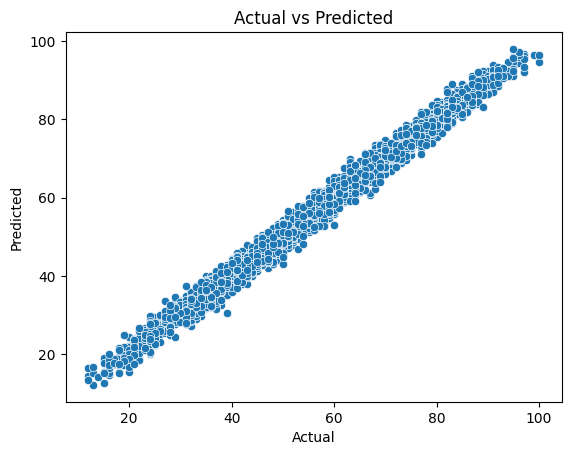

In [96]:
sns.scatterplot(x = y_test, y = y_pred)

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')


In [97]:
print('Mean absolute error=', mean_absolute_error(y_test,y_pred))
print('Mean squared error=', mean_squared_error(y_test,y_pred))
print('Root mean squared error=', (mean_squared_error(y_test,y_pred))**0.5)
resdul = y_test - y_pred
print(resdul)
print("_"*100)
resdul.describe()

Mean absolute error= 1.618862513416917
Mean squared error= 4.149457507505188
Root mean squared error= 2.0370217248486053
8793   -2.866895
1122   -0.482722
1283   -1.316405
9318    0.898779
7765    0.993386
          ...   
3024   -4.634570
5904   -1.323849
3807    0.210538
6746    5.039371
7377   -0.434261
Name: Performance Index, Length: 3000, dtype: float64
____________________________________________________________________________________________________


count    3000.000000
mean       -0.073155
std         2.036047
min        -6.968723
25%        -1.432485
50%        -0.094167
75%         1.315128
max         8.462569
Name: Performance Index, dtype: float64

<Axes: xlabel='Performance Index', ylabel='Count'>

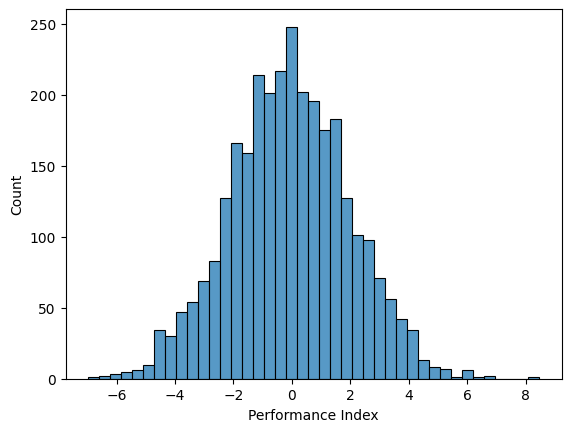

In [89]:
sns.histplot(resdul)

<ipython-input-95-dbbd15ef7f35>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resdul)


<Axes: xlabel='Performance Index', ylabel='Density'>

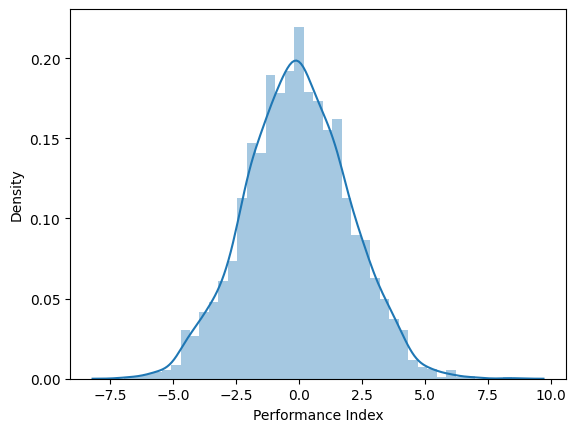

In [95]:
sns.distplot(resdul)